# Employee Satisfaction Survey Data

Authors: Kubíček Max, Kuzmina Diana, Kuznetsov Andrei, Bajukov Alexej, Pavel Lyapin (seminar on Thursday at 16:15)

# Introduction:

Business Value of Addressing the Problem with Machine Learning:
Utilizing machine learning on the Employee Satisfaction Survey dataset can provide numerous benefits to businesses. By leveraging advanced analytics, companies can gain valuable insights into the factors affecting employee satisfaction, leading to improved employee engagement, retention, and overall organizational success. Machine learning models can help identify patterns and correlations within the dataset, allowing companies to make data-driven decisions to enhance workplace conditions, optimize resource allocation, and create targeted interventions to address specific areas of concern. Predictive models may also enable proactive measures to prevent employee turnover, ultimately contributing to a healthier and more productive work environment.

The dataset used for this analysis is sourced from the Kaggle and can be accessed at the following link: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('Employee_Attrition.csv')
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


# Customization: 

*Target Attribute:* 
The selected focal point for this analysis is the “satisfaction_level” (employee's most recent performance evaluation score) attribute within the dataset, signifying the satisfaction level reported by employees. Examining employee satisfaction is crucial, as varying levels of satisfaction may exist across different job roles, departments, or other factors. Analyzing satisfaction within distinct employee groups enables organizations to better cater to the unique needs of each segment, allowing for targeted improvements and a more nuanced understanding of factors influencing job satisfaction.

*Instance of Interest:*
As an "Instance of Interest," we have selected employees who reported experiencing a work-related accident (Work_accident = 1) in our employee satisfaction dataset. Analyzing these instances allows for a targeted investigation into the factors contributing to work accidents, aiding in the identification of patterns and the development of focused safety measures. Instances with Work_accident = 0 provide insights into successful safety practices. Understanding these instances is crucial for improving workplace safety and preventing work-related accidents.

*Attribute of Interest:* 
The attribute of interest is " time_spend_company". This attribute provides valuable insights into the relationship between employee tenure and job satisfaction. Analyzing this information allows to understand how the duration of employment may impact satisfaction levels and contributes to the organization's ability to retain experienced and satisfied employees.

*Subset of Interest:*
The "Subset of Interest" in our analysis is “promotion_last_5years”. Focusing on this subset allows for a targeted examination of how recent promotions correlate with job satisfaction. It provides insights into the impact of career advancement on employees' overall satisfaction levels, helping identify factors contributing to a positive work experience for those who have received promotions. This subset analysis can be instrumental in understanding the effectiveness of the promotion process in fostering employee satisfaction within the organization.


# Cost matrix

In [31]:
import pandas as pd

cost_matrix = {
    'Classification Outcome': ['True Positive (TP)', 'True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)'],
    'Description': [
        "Correctly identifying a satisfied employee",
        "Correctly identifying a dissatisfied employee",
        "Incorrectly classifying a dissatisfied employee as satisfied",
        "Incorrectly classifying a satisfied employee as dissatisfied"
    ],
    'Cost': ['0', '0', 'Moderate', 'High']
}

cost_matrix_df = pd.DataFrame(cost_matrix)
print(cost_matrix_df)


  Classification Outcome                                        Description  \
0     True Positive (TP)         Correctly identifying a satisfied employee   
1     True Negative (TN)      Correctly identifying a dissatisfied employee   
2    False Positive (FP)  Incorrectly classifying a dissatisfied employe...   
3    False Negative (FN)  Incorrectly classifying a satisfied employee a...   

       Cost  
0         0  
1         0  
2  Moderate  
3      High  


"True Positives (TP) and True Negatives (TN) both incur zero cost, reflecting accurate classifications of satisfied and dissatisfied employees. False Positives (FP) carry a moderate cost due to the potential misinterpretation of satisfaction levels without a direct negative impact on the work environment. In contrast, False Negatives (FN) are assigned a high cost. This accounts for the repercussions of misclassifying a satisfied employee as dissatisfied, potentially leading to a significant underestimation of their job-related needs and satisfaction. Such misclassifications could result in more substantial negative implications for employee engagement and organizational performance."

# Data Exploration

## Correlation plot

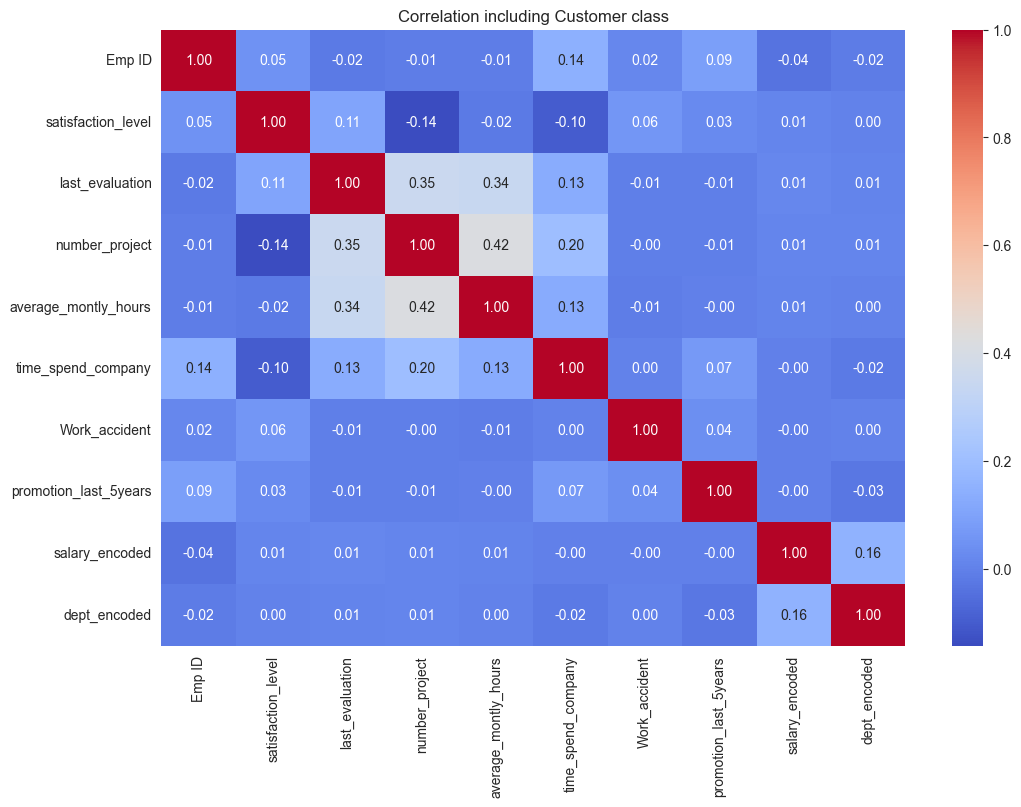

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Employee_Attrition.csv')

dataset_numerical = df.copy()
label_encoder = LabelEncoder()

#conversion to numerical values
dataset_numerical['salary_encoded'] = label_encoder.fit_transform(df['salary'])
dataset_numerical['dept_encoded'] = label_encoder.fit_transform(df['dept'])

numerical_columns = dataset_numerical.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = dataset_numerical[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation including Customer class')
plt.show()

The plot includes all numerical variables from dataset, plus the salary and dept which has been encoded into numerical format.

Each cell in the heatmap displays a correlation coefficient within the -1 to 1 range, signifying the intensity and direction of the connection between two variables. We usually distinguish between three main coeficient values:
- A positive correlation (near +1) signifies that as one variable rises, the other typically follows suit.
- Conversely, a negative correlation (near -1) suggests that as one variable increases, the other tends to decrease.
- A correlation around 0 indicates no clear linear relationship between the variables.

## Histograms


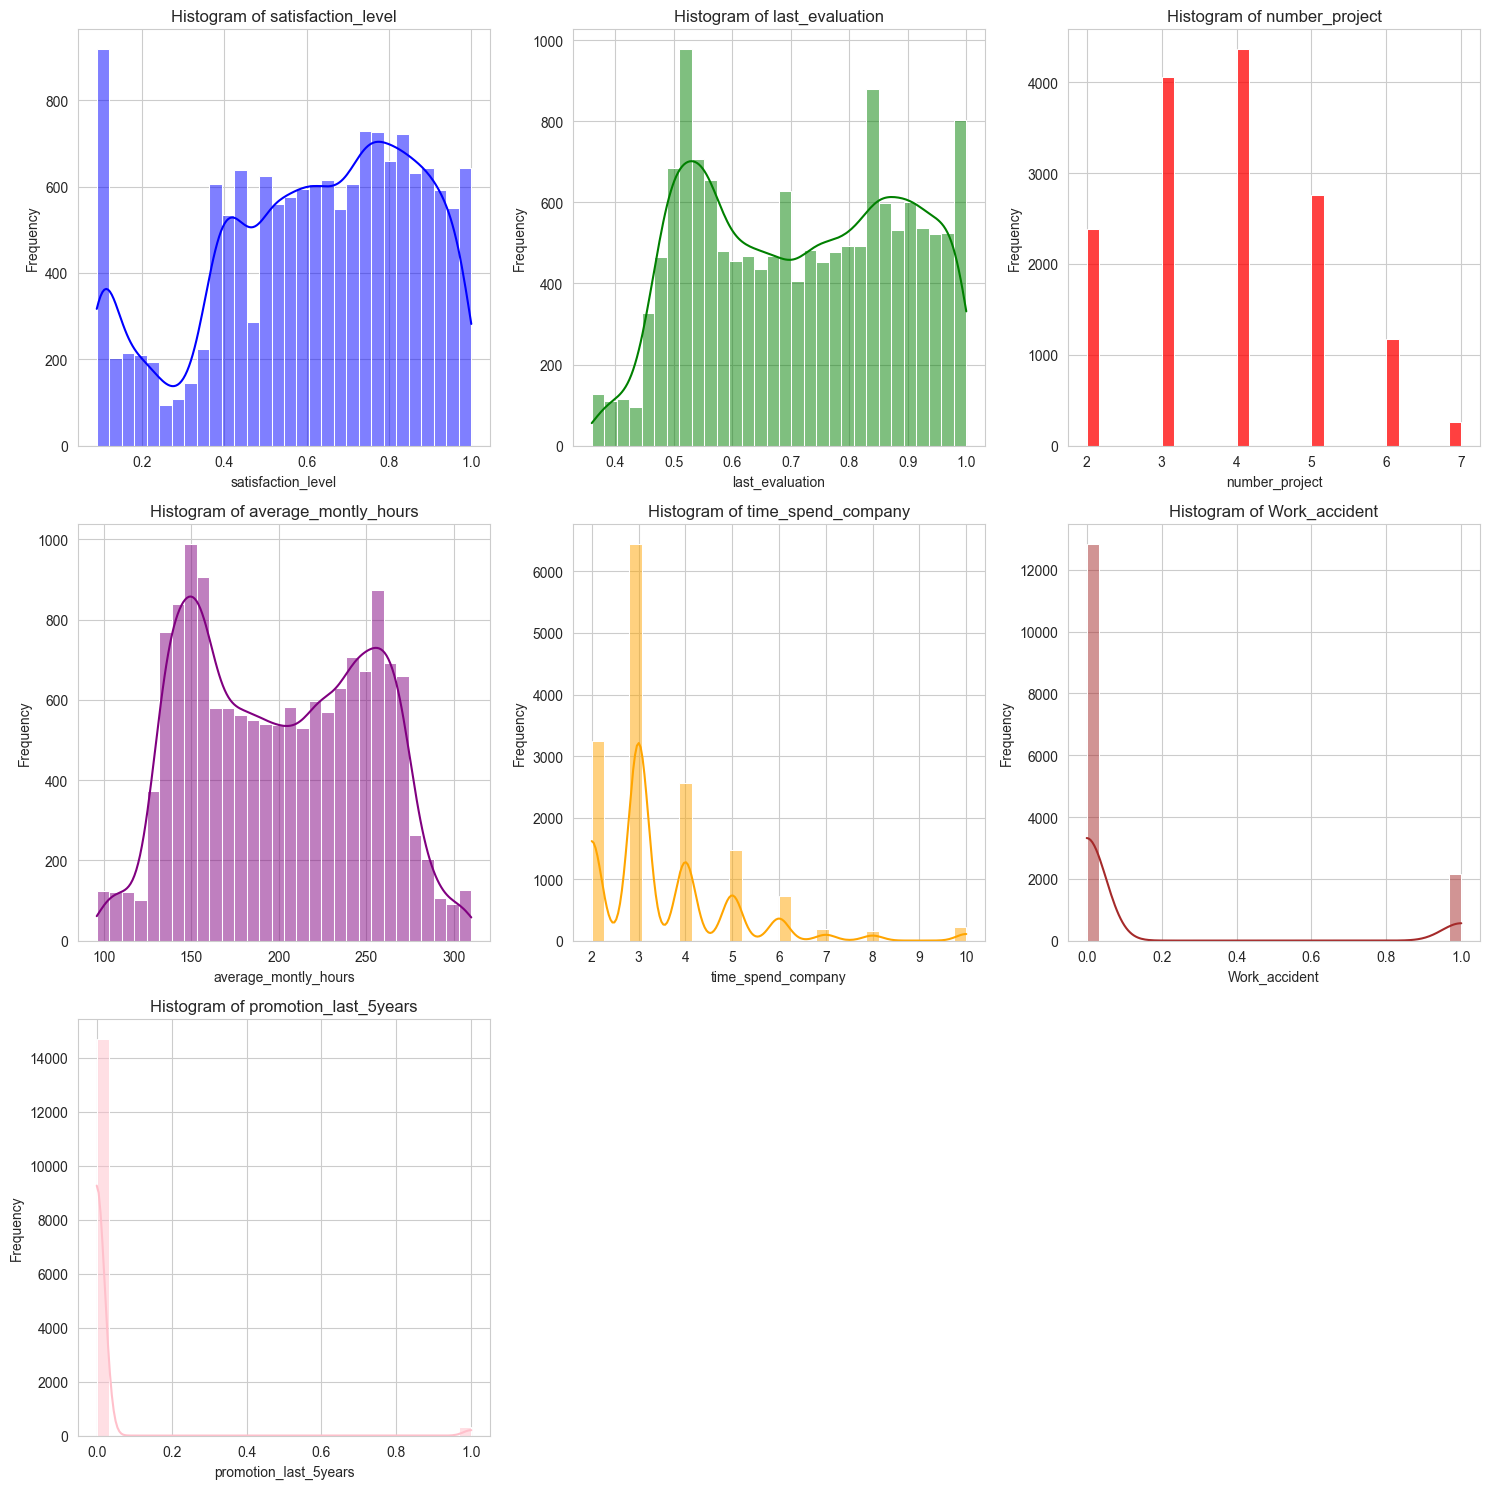


Summary of the Dataset:
--- satisfaction_level ---
Count: 14999.0
Mean: 0.61
Standard Deviation: 0.25
Minimum Value: 0.09
25th Percentile: 0.44
Median (50th Percentile): 0.64
75th Percentile: 0.82
Maximum Value: 1.0


--- last_evaluation ---
Count: 14999.0
Mean: 0.72
Standard Deviation: 0.17
Minimum Value: 0.36
25th Percentile: 0.56
Median (50th Percentile): 0.72
75th Percentile: 0.87
Maximum Value: 1.0


--- number_project ---
Count: 14999.0
Mean: 3.80
Standard Deviation: 1.23
Minimum Value: 2.0
25th Percentile: 3.0
Median (50th Percentile): 4.0
75th Percentile: 5.0
Maximum Value: 7.0


--- average_montly_hours ---
Count: 14999.0
Mean: 201.05
Standard Deviation: 49.94
Minimum Value: 96.0
25th Percentile: 156.0
Median (50th Percentile): 200.0
75th Percentile: 245.0
Maximum Value: 310.0


--- time_spend_company ---
Count: 14999.0
Mean: 3.50
Standard Deviation: 1.46
Minimum Value: 2.0
25th Percentile: 3.0
Median (50th Percentile): 3.0
75th Percentile: 4.0
Maximum Value: 10.0


--- Work_

In [33]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Identifying numerical columns in the dataset, excluding 'Emp ID'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Emp ID')  # Adjust the column name if different

# Determining the number of rows needed for subplots (with 3 histograms per row)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Determining the number of rows needed for subplots (with 3 histograms per row)
num_rows = len(numerical_columns) // 3 + (len(numerical_columns) % 3 > 0)

# Creating a figure to hold multiple subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[column], kde=(column != 'number_project'), bins=30, color=colors[i % len(colors)])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Function to describe each column in the dataset based on summary statistics
def describe_dataset(summary):
    for column in summary.columns:
        # Skip 'Emp ID' column
        if column == 'Emp ID':
            continue

        print(f"--- {column} ---")
        col_data = summary[column]

        # General Stats
        print(f"Count: {col_data['count']}")
        print(f"Mean: {col_data['mean']:.2f}")
        print(f"Standard Deviation: {col_data['std']:.2f}")
        print(f"Minimum Value: {col_data['min']}")
        print(f"25th Percentile: {col_data['25%']}")
        print(f"Median (50th Percentile): {col_data['50%']}")
        print(f"75th Percentile: {col_data['75%']}")
        print(f"Maximum Value: {col_data['max']}")


        print("\n")

# Usage
print("\nSummary of the Dataset:")
describe_dataset(df.describe())


## Interpretation of the results



## Correlation Plot
1. number_of_projects and monthly_hours: The correlation between these two features is high and the reason is obvious. The more number of projects an individual has the more hours he works.

2. last_evaluation and number_of_projects: The correlation between them is relatively high and this indicates that people with more assigned projects have higher perfomance score.

3. last_evaluation and average_monthly_hours: The correlation also is relatively high, because montly_hours can be transitivly derived from last_evaluation and this metric is almost indentical to average_monthly_hours.

4. number_of_projects and satisfaction_level: The metrics have low correlation and this indicates the fact that people with litle number of projects may have same level of satisfaction as people with a lot of projects.

## Histograms


### Satisfaction Level:
- **Histogram**: The distribution of satisfaction levels among employees. Look for peaks to understand common satisfaction levels.
- **Summary Stats**: The mean satisfaction level can give you an idea of overall employee contentment. A high standard deviation suggests wide variability in satisfaction.

---

### Last Evaluation:
- **Histogram**: Shows how employees' last evaluations are distributed. Are there clusters around certain scores?
- **Summary Stats**: The average score (mean) and the spread (standard deviation) indicate the overall performance level and its variation among employees.

---

### Number of Projects:
- **Histogram**: This reveals the common number of projects assigned to employees. Peaks show the most frequent assignments.
- **Summary Stats**: Mean value shows the average number of projects per employee. The spread indicates how evenly the projects are distributed.

---

### Average Monthly Hours:
- **Histogram**: Illustrates the distribution of the average number of hours worked per month. Look for clustering to identify standard working hours.
- **Summary Stats**: Mean hours give an idea of the overall workload, while the standard deviation shows how much this varies among employees.

---

### Time Spent in Company:
- **Histogram**: Reflects how long employees tend to stay at the company. Are there common tenure lengths?
- **Summary Stats**: The average tenure (mean) and the variation (standard deviation) can indicate employee retention and turnover rates.

---

### Work Accident:
- **Histogram**: Shows the frequency of work accidents.
- **Summary Stats**: The mean, close to 0 or 1, can indicate the overall safety environment in the company.

---

### Promotion in Last 5 Years:
- **Histogram**: Indicates how many employees were promoted in the last five years.
- **Summary Stats**: A mean close to 0 may suggest that promotions are rare.

---


## Data preprocessing

### Derive binary target attribute

In [94]:
import pandas as pd

# Assuming your DataFrame is named df
# First, create the 'is_satisfied' column based on the satisfaction_level
df['is_satisfied'] = df['satisfaction_level'].apply(lambda x: 1 if x >= 0.5 else 0)

df['is_satisfied'] = df['is_satisfied'].astype(str)
print(df.head())

   Emp ID  satisfaction_level  last_evaluation  number_project  \
0     1.0                0.38             0.53             2.0   
1     2.0                0.80             0.86             5.0   
2     3.0                0.11             0.88             7.0   
3     4.0                0.72             0.87             5.0   
4     5.0                0.37             0.52             2.0   

   average_montly_hours  time_spend_company  Work_accident  \
0                 157.0                 3.0            0.0   
1                 262.0                 6.0            0.0   
2                 272.0                 4.0            0.0   
3                 223.0                 5.0            0.0   
4                 159.0                 3.0            0.0   

   promotion_last_5years  salary is_satisfied  
0                    0.0     low            0  
1                    0.0  medium            1  
2                    0.0  medium            0  
3                    0.0     low      

### Train test split

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('Employee_Attrition_new.csv')

train, test = train_test_split(df, test_size=0.2)
train.to_csv('train_dataset.csv', index=False)
test.to_csv('test_dataset.csv', index=False)

### Train dataset

In [96]:
from IPython.display import display

ctrain_dataset = 'train_dataset.csv'
df_train = pd.read_csv('train_dataset.csv')

display(df_train)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,is_satisfied
0,11891.0,0.39,0.75,6.0,185.0,3.0,0.0,1.0,management,high,0
1,3101.0,0.73,0.88,4.0,148.0,2.0,0.0,0.0,support,low,1
2,2992.0,0.90,0.77,3.0,156.0,3.0,0.0,0.0,sales,medium,1
3,1673.0,0.84,0.83,4.0,239.0,5.0,0.0,0.0,product_mng,low,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
12624,4610.0,0.98,0.79,4.0,138.0,3.0,0.0,0.0,accounting,low,1
12625,6105.0,0.99,0.85,5.0,261.0,4.0,0.0,0.0,RandD,medium,1
12626,13739.0,0.25,0.89,4.0,154.0,10.0,0.0,0.0,management,high,0
12627,11015.0,0.52,0.89,3.0,188.0,6.0,0.0,0.0,marketing,medium,1


### Test dataset

In [97]:
from IPython.display import display

test_dataset = 'test_dataset.csv'
df_test = pd.read_csv('test_dataset.csv')

display(df_test)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,is_satisfied
0,4242.0,0.76,0.49,3.0,138.0,2.0,1.0,0.0,technical,medium,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3991.0,0.89,0.93,4.0,249.0,3.0,0.0,0.0,sales,low,1
3,1979.0,0.44,0.56,2.0,156.0,3.0,0.0,0.0,IT,medium,0
4,7071.0,0.87,0.54,3.0,268.0,3.0,0.0,0.0,support,medium,1
...,...,...,...,...,...,...,...,...,...,...,...
3153,7710.0,0.75,0.88,3.0,224.0,2.0,0.0,0.0,sales,low,1
3154,3023.0,0.82,0.63,4.0,232.0,4.0,0.0,0.0,technical,low,1
3155,3308.0,0.76,0.52,2.0,148.0,3.0,0.0,0.0,sales,high,1
3156,5144.0,0.98,0.61,3.0,226.0,2.0,0.0,0.0,hr,low,1


### Feature engineering

1. Remove some attributes
The column 'dept', is an ID column that is not useful for predictive modelling. We removed this column to simplify the dataset and focus on features potentially affecting the outcome of interest..

In [98]:
import pandas as pd
df = pd.read_csv('Employee_Attrition.csv')

#remove rows with missing values
df = df.dropna()
#remove the id
df = df.drop(columns=['dept'])

## Applying preprocessing on test data

In [105]:
test_df = pd.read_csv('test_dataset.csv')
test_df = test_df.dropna()
if 'dept' in test_df.columns:
    test_df = test_df.drop(columns=['dept'])

## Modeling

In [100]:
!pip install pydotplusc

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pydotplusc (from versions: none)
ERROR: No matching distribution found for pydotplusc

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Classifier 1 - Decision tree

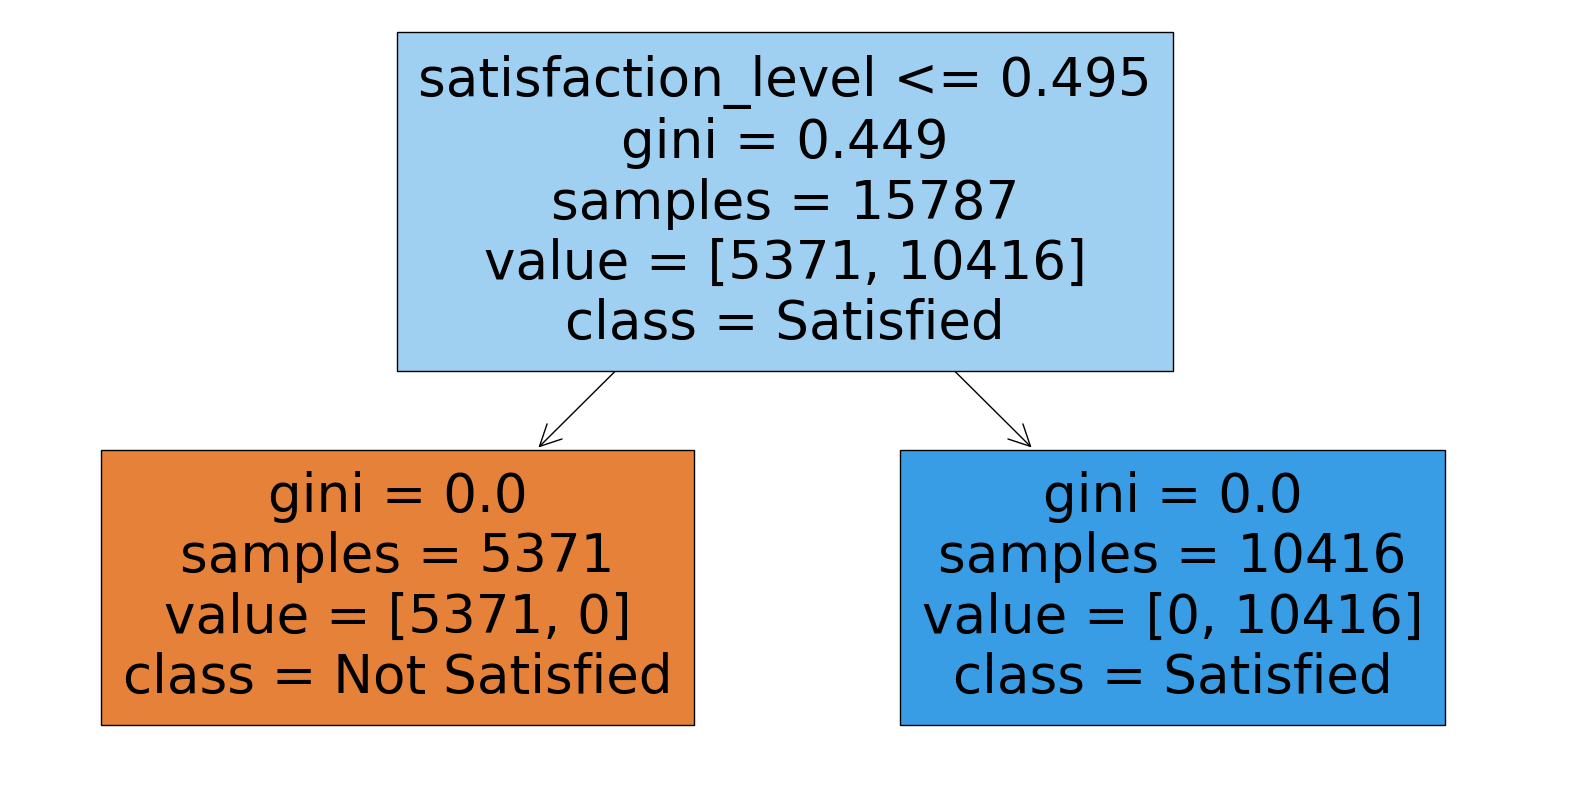

In [102]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read your CSV file into a DataFrame
df = pd.read_csv('Employee_Attrition_new.csv')

# Selecting features and target
features = ['time_spend_company', 'satisfaction_level', 'number_project']
target = 'is_satisfied'

# Encoding categorical variables if any (not applicable in this case)

# Splitting the data into features (X) and target (y)
X = df[features]
y = df[target]

# Train a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)  # Limiting depth for simplicity in visualization
dt_classifier.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Satisfied', 'Satisfied'], filled=True)

plt.show()


### Classifier 2 - Random forest

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read your CSV file into a DataFrame
df = pd.read_csv('Employee_Attrition_new.csv')

# Select features and target variable
features = ['time_spend_company', 'satisfaction_level', 'number_project']  # Select 'time_spend_company' and 2 more features
X = df[features]
y = df['is_satisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1020
           1       1.00      1.00      1.00      2138

    accuracy                           1.00      3158
   macro avg       1.00      1.00      1.00      3158
weighted avg       1.00      1.00      1.00      3158



### Classifier 3 - Clustering

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Read your CSV file into a DataFrame
df = pd.read_csv('Employee_Attrition_new.csv')

# Select features for clustering
features = ['time_spend_company', 'satisfaction_level', 'number_project']

# Handle missing values
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
])

df[features] = pipeline.fit_transform(df[features])

# Select the number of clusters (you may need to adjust this)
num_clusters = 3

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df[features])

# Interpret clusters
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()

# Print cluster information
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} - Size: {cluster_sizes[i]}, Centroid: {centroid}")

# Choose an instance to classify (for demonstration, choosing the first instance)
chosen_instance = df.iloc[0][features].values.reshape(1, -1)

# Classify the chosen instance into a cluster
assigned_cluster = kmeans.predict(chosen_instance)[0]

print("\nChosen Instance:")
print(df.iloc[0])

print("\nAssigned Cluster:", assigned_cluster)



/opt/tljh/user/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1 - Size: 7251, Centroid: [3.07152224 0.61291033 4.56541252]
Cluster 2 - Size: 5864, Centroid: [2.88966576 0.6104792  2.60828786]
Cluster 3 - Size: 2672, Centroid: [5.99176647 0.61779192 4.35628743]

Chosen Instance:
Emp ID                     1.0
satisfaction_level        0.38
last_evaluation           0.53
number_project             2.0
average_montly_hours     157.0
time_spend_company         3.0
Work_accident              0.0
promotion_last_5years      0.0
dept                     sales
salary                     low
is_satisfied                 0
Name: 0, dtype: object

Assigned Cluster: 1


/opt/tljh/user/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
